In [74]:
# from google.colab import files
# files.upload()  # Selecciona tu archivo kaggle.json cuando se abra el di√°logo

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d spscientist/students-performance-in-exams
!unzip students-performance-in-exams.zip

Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
License(s): unknown
  0% 0.00/8.70k [00:00<?, ?B/s]
100% 8.70k/8.70k [00:00<00:00, 26.3MB/s]
Archive:  students-performance-in-exams.zip
  inflating: StudentsPerformance.csv  


In [4]:
import pandas as pd
df = pd.read_csv("StudentsPerformance.csv")
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [5]:
print(df.dtypes)


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


- Las primeras 5 columnas son categ√≥ricas (object).
- Las √∫ltimas 3 son num√©ricas (int64).

In [6]:
print(df.isnull().sum())


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


no hay valores nulos.

In [7]:
print(df.describe())


       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


**Variables num√©ricas (`describe()`)**

1. **math score**

   * Media: 66, rango: 0 a 100.
   * Alta dispersi√≥n (std = 15.16).
   * Hay al menos un caso con puntaje 0 ‚Üí posible caso at√≠pico o fracaso total.

2. **reading score**

   * Media m√°s alta que en matem√°ticas (69.17).
   * El m√≠nimo es 17 ‚Üí no hay ceros.
   * Menor dispersi√≥n que matem√°ticas.

3. **writing score**

   * Media intermedia (68.05).
   * El m√≠nimo es 10.
   * Desviaci√≥n similar a las otras dos ‚Üí comportamiento parejo.


*Todos los puntajes est√°n en la misma escala (0‚Äì100), lo que facilita comparaciones.*

In [8]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumna: {col}")
    print(df[col].value_counts())



Columna: gender
gender
female    518
male      482
Name: count, dtype: int64

Columna: race/ethnicity
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

Columna: parental level of education
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

Columna: lunch
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

Columna: test preparation course
test preparation course
none         642
completed    358
Name: count, dtype: int64


**Variables categ√≥ricas (`value_counts()`)**

1. **gender**

   * Ligeramente m√°s mujeres (518) que hombres (482).
   * Equilibrado ‚Üí se puede comparar por g√©nero sin problema.

2. **race/ethnicity**

   * Grupo C es el m√°s numeroso, seguido de D y B.
   * Grupo A es el menos representado (s√≥lo 89).
   * Puede influir en an√°lisis socioculturales o de rendimiento.

3. **parental level of education**

   * Distribuci√≥n variada.
   * "Some college" y "Associate's degree" son las m√°s frecuentes.
   * "Master‚Äôs degree" es minoritaria ‚Üí √∫til para contrastes.

4. **lunch**

   * Mayor√≠a tiene almuerzo "standard" (645 vs 355).
   * Variable interesante para an√°lisis socioecon√≥mico (el tipo ‚Äúfree/reduced‚Äù suele asociarse a bajos recursos).

5. **test preparation course**

   * Mayor√≠a **no** complet√≥ el curso (642 vs 358).
   * Puede ser clave para explicar diferencias de rendimiento.

---

## Visualizacion de los datos a trabajar

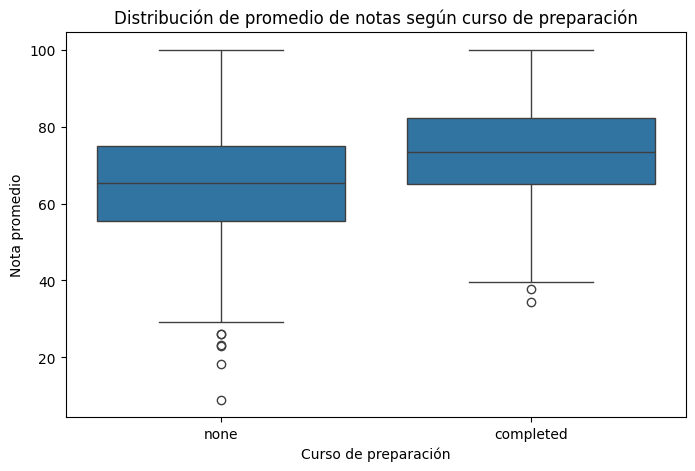

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear columna de promedio si no existe
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='test preparation course', y='average_score', data=df)
plt.title('Distribuci√≥n de promedio de notas seg√∫n curso de preparaci√≥n')
plt.xlabel('Curso de preparaci√≥n')
plt.ylabel('Nota promedio')
plt.show()


> Como se puede ver, los que completaron el curso obtuvieron en promedio mejores notas.

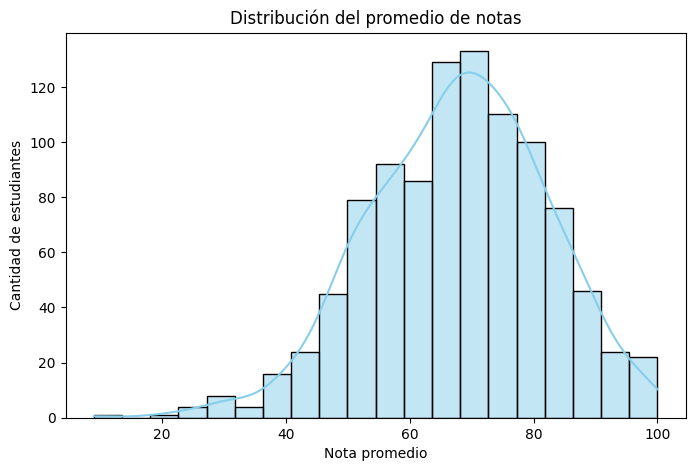

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['average_score'], bins=20, kde=True, color='skyblue')
plt.title('Distribuci√≥n del promedio de notas')
plt.xlabel('Nota promedio')
plt.ylabel('Cantidad de estudiantes')
plt.show()


> La distribuci√≥n del promedio de notas presenta una forma aproximadamente normal, con la mayor√≠a de los estudiantes concentrados entre 60 y 80 puntos. El valor m√°s frecuente ronda los 70 puntos, lo que indica un rendimiento general moderado a alto. Hay pocos estudiantes con promedios extremadamente bajos o altos, lo que sugiere que los casos at√≠picos son escasos.

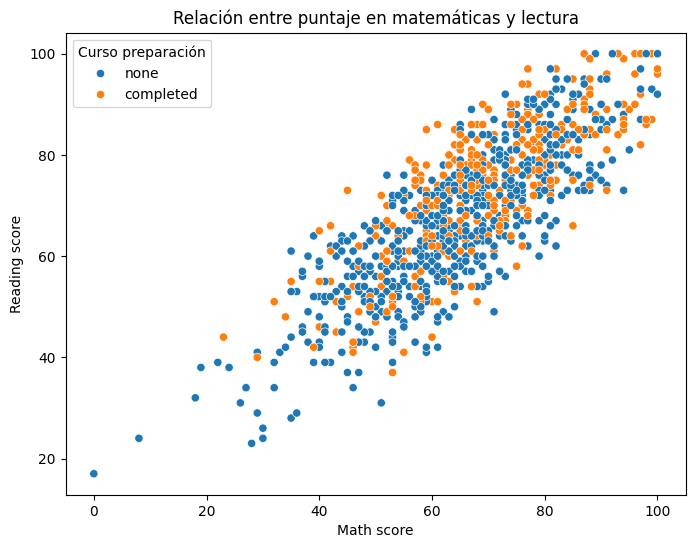

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='math score', y='reading score', hue='test preparation course', data=df)
plt.title('Relaci√≥n entre puntaje en matem√°ticas y lectura')
plt.xlabel('Math score')
plt.ylabel('Reading score')
plt.legend(title='Curso preparaci√≥n')
plt.show()


> Esta relacion nos muestra que los estudiantes que completaron el curso obruvieron mejores notas en matematicas y lectura.

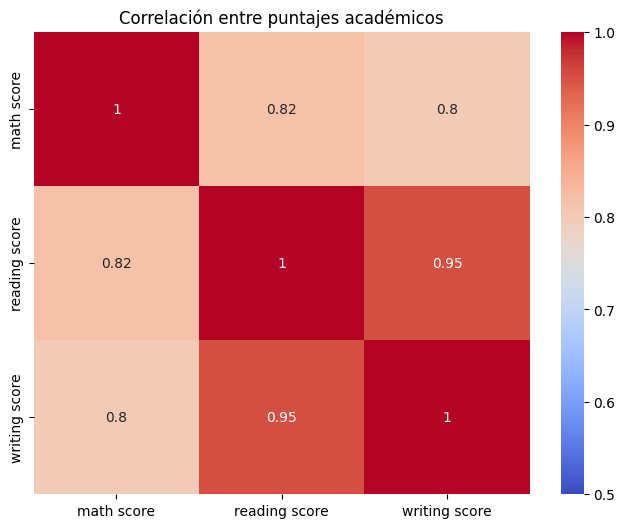

In [12]:
import numpy as np

plt.figure(figsize=(8, 6))
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='coolwarm', vmin=0.5)
plt.title('Correlaci√≥n entre puntajes acad√©micos')
plt.show()


## Modelos Supervisados:

In [13]:
# Calcular promedio de notas
df["average_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)

# Crear variable objetivo binaria (umbral: 60)
df["approved"] = df["average_score"] >= 60

# Verificar distribuci√≥n de clases
df["approved"].value_counts()


approved
True     715
False    285
Name: count, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

# Variables predictoras y objetivo
X = df.drop(columns=["approved"])
y = df["approved"]

# Divisi√≥n con 30% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mostrar tama√±os
print("Tama√±o conjunto de entrenamiento:", X_train.shape)
print("Tama√±o conjunto de prueba:", X_test.shape)


Tama√±o conjunto de entrenamiento: (700, 9)
Tama√±o conjunto de prueba: (300, 9)


In [15]:
# Aplicar get_dummies a todas las columnas categ√≥ricas
X = pd.get_dummies(df.drop(columns=["approved"]), drop_first=True)
y = df["approved"]

# Divisi√≥n con test_size = 0.3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)


X_train shape: (700, 16)
X_test shape : (300, 16)


In [16]:
# Regresi√≥n Log√≠stica
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression(max_iter=1000)
modelo_lr.fit(X_train, y_train)
y_pred_lr = modelo_lr.predict(X_test)


# Vecinos m√°s cercanos (KNeighborsClassifier)


In [17]:
# crear variable booleana que indica si un estudiante aprob√≥,
# usando el promedio de sus tres notas
df['final_grade'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
df['approved'] = df['final_grade'] >= 10
df['approved'].value_counts()

approved
True     999
False      1
Name: count, dtype: int64

In [18]:
# preparaci√≥n de variable x e y
# conversi√≥n de las variables categ√≥ricas en variables num√©ricas
X = pd.get_dummies(df.drop(columns=['final_grade', 'approved']), drop_first=True)
y = df['approved']

In [19]:
# division del dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
# clasificador: K-Nearest Neighbors (KNN)
# busca los vecinos m√°s cercanos (5) a un nuevo estudiante y
# decide su clase (aprobado true o false) seg√∫n la mayor√≠a
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Accuracy: 0.995
Precisi√≥n: 0.995
Recall: 1.0
F1 Score: 0.9974937343358395


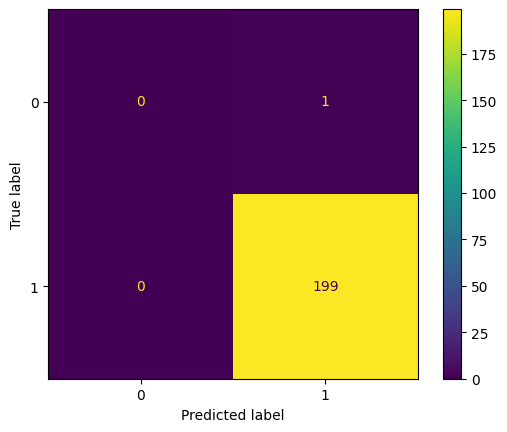

In [21]:
# evaluaci√≥n del modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precisi√≥n:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

- Accuracy (Exactitud): qu√© tan seguido acierta el modelo.

- Precisi√≥n: de todos los que predijo como ‚Äúaprueba‚Äù, ¬øcu√°ntos aprobaron realmente?

- Recall (Sensibilidad): de todos los que aprobaron, ¬øcu√°ntos fueron detectados?

- F1-Score: equilibrio entre precisi√≥n y recall.


# √Årbol de decisi√≥n (DecisionTreeClassifier)

In [22]:
from sklearn.tree import DecisionTreeClassifier

#entrenamiento del modelo
arbol = DecisionTreeClassifier(random_state=42)
arbol.fit(X_train, y_train)
y_pred_arbol = arbol.predict(X_test)

In [23]:
print('Accuracy:', accuracy_score(y_test, y_pred_arbol))
print('Precisi√≥n:', precision_score(y_test, y_pred_arbol))
print('Recall:', recall_score(y_test, y_pred_arbol))
print('F1 Score:', f1_score(y_test, y_pred_arbol))

Accuracy: 0.995
Precisi√≥n: 0.995
Recall: 1.0
F1 Score: 0.9974937343358395


Qu√© tan bien clasific√≥ el √°rbol si un estudiante aprueba o no:

- Accuracy: aciertos totales / total de casos.

- Precisi√≥n: cu√°ntos de los que predijo como "aprueba" realmente aprobaron.

- Recall: cu√°ntos de los que s√≠ aprobaron fueron detectados por el modelo.

- F1 Score: equilibrio entre precisi√≥n y recall.

In [24]:
# qu√© variables us√≥ m√°s el √°rbol para tomar decisiones.
import pandas as pd
import matplotlib.pyplot as plt

# importancia de cada variable
importancias = pd.Series(arbol.feature_importances_, index=X.columns)
importancias = importancias.sort_values(ascending=False).head(10)


## Modelos No Supervisados

**Variables seleccionadas reales:**

- math score

- reading score

- writing score

- test preparation course (0/1)

- lunch (0/1) indicador socioecon√≥mico

- parental level of education (codificada como ordinal)

- gender y race/ethnicity (convertidas con one-hot encoding)

In [25]:
# Asegurar transformaci√≥n de variables categ√≥ricas a num√©ricas

# 1. Codificar binarios
df['lunch'] = df['lunch'].map({'standard': 1, 'free/reduced': 0})
df['test preparation course'] = df['test preparation course'].map({'completed': 1, 'none': 0})

# 2. Codificar ordinal
edu_order = {
    "some high school": 0,
    "high school": 1,
    "some college": 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5
}
df['parental level of education'] = df['parental level of education'].map(edu_order)

# 3. One-hot encoding
df = pd.get_dummies(df, columns=['gender', 'race/ethnicity'], drop_first=True)


In [26]:
from sklearn.preprocessing import StandardScaler

# Variables para clustering
features = [
    'math score', 'reading score', 'writing score',
    'test preparation course', 'lunch', 'parental level of education',
] + [col for col in df.columns if col.startswith('gender_') or col.startswith('race/ethnicity_')]

X = df[features]

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [27]:
# Variables para clustering
features = [
    'math score', 'reading score', 'writing score'
]

X2 = df[features]

# Escalado
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

In [28]:
from sklearn.decomposition import PCA

# PCA a 2 dimensiones para visualizar
pca = PCA(n_components=2)
X2_pca = pca.fit_transform(X2_scaled)


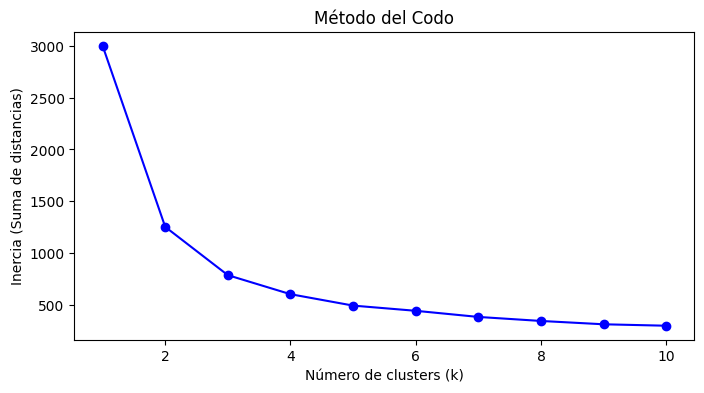

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X2_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('N√∫mero de clusters (k)')
plt.ylabel('Inercia (Suma de distancias)')
plt.title('M√©todo del Codo')
plt.show()

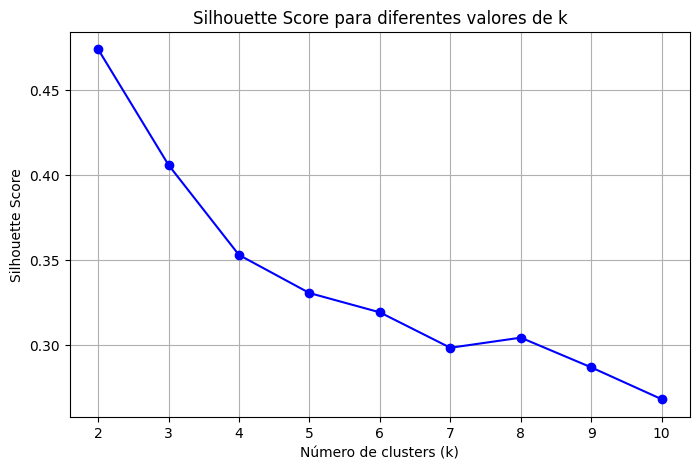

In [32]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = range(2, 11)  # Empezamos desde 2 porque silhouette no est√° definido para k=1

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X2_scaled)
    score = silhouette_score(X2_scaled, labels)
    silhouette_scores.append(score)

# Gr√°fico
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'bo-')
plt.title('Silhouette Score para diferentes valores de k')
plt.xlabel('N√∫mero de clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [33]:
from sklearn.decomposition import PCA

# PCA a 2 dimensiones para visualizar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


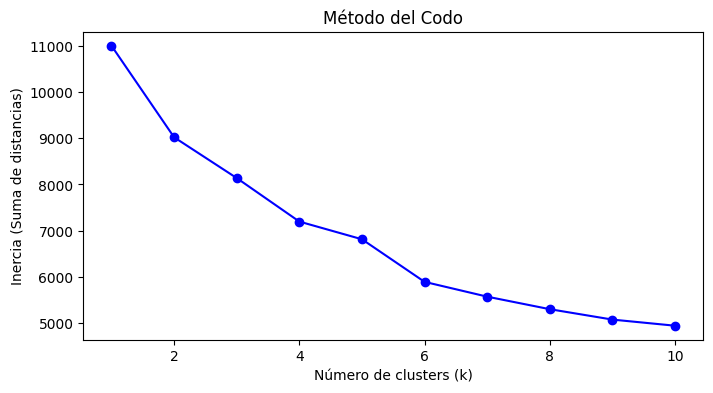

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('N√∫mero de clusters (k)')
plt.ylabel('Inercia (Suma de distancias)')
plt.title('M√©todo del Codo')
plt.show()


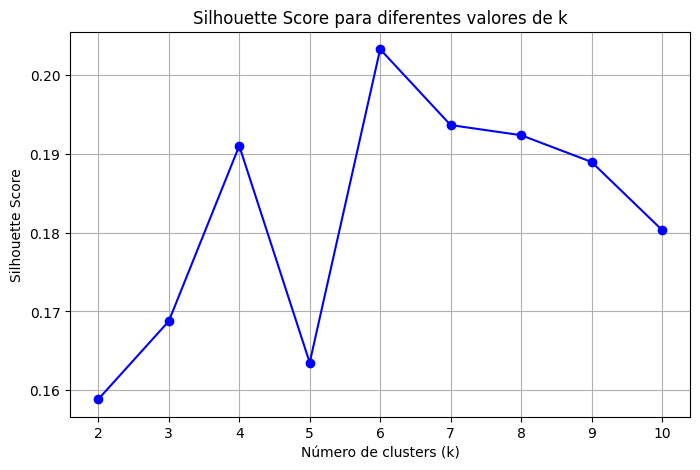

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
k_values = range(2, 11)  # Empezamos desde 2 porque silhouette no est√° definido para k=1

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Gr√°fico
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'bo-')
plt.title('Silhouette Score para diferentes valores de k')
plt.xlabel('N√∫mero de clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


### Modelo K_Means

se realizara de 2 formas

A partir de los resultados de Elbow(Codo) y Silhouette se llego a la desicion de utilizar k=6, es decir, 6 Clusters

In [36]:
X2.head(2)


math score  reading score  writing score
0          72             72             74
1          69             90             88

In [37]:
X2_scaled

array([[ 0.39002351,  0.19399858,  0.39149181],
       [ 0.19207553,  1.42747598,  1.31326868],
       [ 1.57771141,  1.77010859,  1.64247471],
       ...,
       [-0.46775108,  0.12547206, -0.20107904],
       [ 0.12609287,  0.60515772,  0.58901542],
       [ 0.71993682,  1.15336989,  1.18158627]])

In [38]:
# Entrenar KMeans con k=6
kmeans_3 = KMeans(n_clusters=4, random_state=42)
clusters_3 = kmeans_3.fit_predict(X2_scaled)

# Agregar los clusters al DataFrame original
df['cluster'] = clusters_3


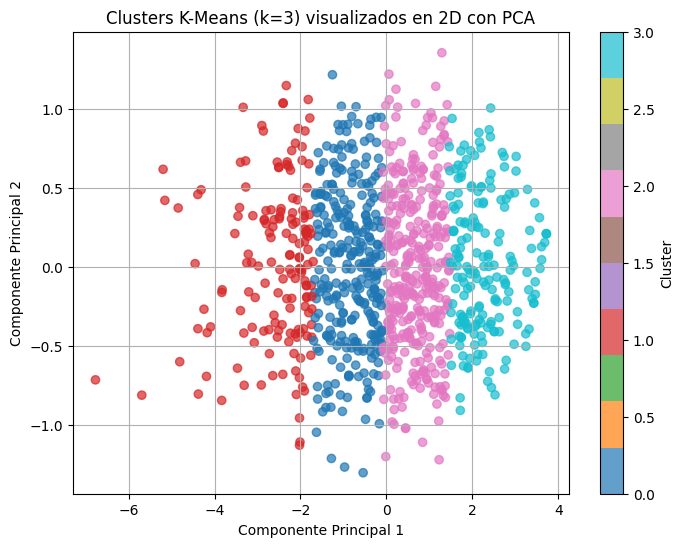

In [39]:
# Visualizaci√≥n en el espacio reducido por PCA
plt.figure(figsize=(8, 6))
plt.scatter(X2_pca[:, 0], X2_pca[:, 1], c=clusters_3, cmap='tab10', alpha=0.7)
plt.title('Clusters K-Means (k=3) visualizados en 2D con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


#### Primera forma

In [40]:
# Entrenar KMeans con k=6
kmeans_6 = KMeans(n_clusters=6, random_state=42)
clusters_6 = kmeans_6.fit_predict(X_scaled)

# Agregar los clusters al DataFrame original
df['cluster'] = clusters_6


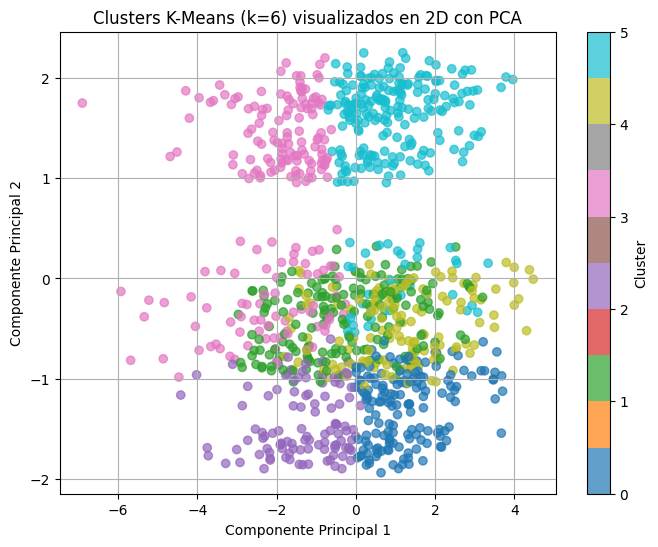

In [41]:
# Visualizaci√≥n en el espacio reducido por PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_6, cmap='tab10', alpha=0.7)
plt.title('Clusters K-Means (k=6) visualizados en 2D con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [42]:
# Agrupaci√≥n por cluster para ver promedios por grupo
cluster_summary = df.groupby('cluster')[features].mean()
display(cluster_summary)


math score  reading score  writing score
cluster                                          
0         75.207792      78.831169      79.402597
1         65.595506      69.370787      67.837079
2         56.175926      57.481481      56.944444
3         50.331606      53.590674      50.803109
4         75.848485      74.954545      73.401515
5         72.502128      77.600000      77.051064

Conclusi√≥n del clustering con k‚ÄØ=‚ÄØ6

1. **Cluster 0**

   * Puntajes altos en matem√°ticas (\~75), lectura (\~79) y escritura (\~79), con una proporci√≥n media de estudiantes que completaron el curso de preparaci√≥n (\~40‚ÄØ%) y la mayor√≠a con almuerzo est√°ndar (\~78‚ÄØ%).
   * Nivel educativo parental intermedio-alto (\~2.35).
   * Predominan estudiantes de la categor√≠a √©tnica D (100‚ÄØ%).
     ‚û§ Perfil: buen desempe√±o acad√©mico, perfil socioecon√≥mico medio-alto y √©tnicamente homog√©neo.

2. **Cluster 1**

   * Rendimiento moderado: matem√°ticas (\~66), lectura (\~69), escritura (\~68).
   * \~38‚ÄØ% completaron el curso, \~67‚ÄØ% con almuerzo est√°ndar.
   * Nivel educativo parental \~1.92.
   * 100‚ÄØ% son hombres.
     ‚û§ Perfil: rendimiento intermedio, predominio de estudiantes masculinos.

3. **Cluster 2**

   * Puntajes bajos-moderados: matem√°ticas (\~56), lectura (\~57), escritura (\~57).
   * Solo \~19‚ÄØ% completaron el curso y \~43‚ÄØ% tienen almuerzo est√°ndar.
   * Nivel educativo parental bajo (\~1.79).
     ‚û§ Perfil: grupo m√°s vulnerable, menor rendimiento acad√©mico, baja preparaci√≥n en el curso y perfil parental bajo.

4. **Cluster 3**

   * Rendimiento bajo: matem√°ticas (\~50), lectura (\~54), escritura (\~51).
   * \~19‚ÄØ% completaron el curso, \~40‚ÄØ% almuerzo est√°ndar.
   * Nivel educativo parental m√°s bajo (\~1.69).
   * Alta representaci√≥n de la categor√≠a C √©tnica (\~62‚ÄØ%).
     ‚û§ Perfil: formaci√≥n acad√©mica m√°s d√©bil y predominancia de un grupo √©tnico espec√≠fico.

5. **Cluster 4**

   * Excelente desempe√±o acad√©mico: matem√°ticas (\~76), lectura (\~75), escritura (\~73).
   * \~45‚ÄØ% completaron el curso, \~73‚ÄØ% almuerzo est√°ndar.
   * Nivel parental intermedio-alto (\~2.33).
   * Todos pertenecen a la categor√≠a √©tnica E (100‚ÄØ%).
     ‚û§ Perfil: alumnos sobresalientes, etnicidad homog√©nea (E), buen nivel socioecon√≥mico.

6. **Cluster 5**

   * Muy buen rendimiento: matem√°ticas (\~72.5), lectura (\~77.6), escritura (\~77).
   * \~48‚ÄØ% completaron el curso, \~79‚ÄØ% almuerzo est√°ndar.
   * Nivel parental \~2.34.
   * Alto porcentaje de estudiantes del grupo √©tnico C (\~85‚ÄØ%).
     ‚û§ Perfil: rendimiento acad√©mico destacado, fuerte presencia de la etnia C, nivel socioecon√≥mico favorable.

---

**Resumen**

* Grupos **0, 4 y 5** est√°n entre los de **mejor rendimiento**, con altos puntajes acad√©micos y buen respaldo familiar/socioecon√≥mico, diferenci√°ndose principalmente por su composici√≥n √©tnica.
* **Clusters 2 y 3** contienen a los estudiantes con **peor desempe√±o**, mostrando menores niveles parental y de preparaci√≥n formal.
* **Cluster 1**, aunque intermedio, est√° marcado por una identidad de g√©nero claramente masculina y una preparaci√≥n acad√©mica moderada.

---

#### Segunda Forma

In [43]:
from sklearn.cluster import KMeans

# Aplicar KMeans con k=6
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Agregar etiquetas de cluster al DataFrame original
df['cluster'] = labels

# Obtener coordenadas de los centroides en el espacio PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)


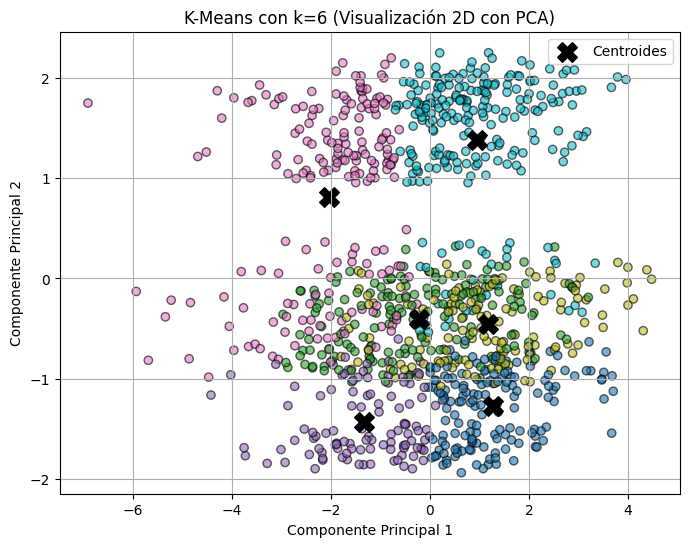

In [44]:
import matplotlib.pyplot as plt

# Graficar clusters con color por grupo
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=labels, cmap='tab10', alpha=0.6, edgecolor='k'
)

# Graficar los centroides
plt.scatter(
    centroids_pca[:, 0], centroids_pca[:, 1],
    c='black', s=200, marker='X', label='Centroides'
)

plt.title('K-Means con k=6 (Visualizaci√≥n 2D con PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()



In [45]:
# Caracter√≠sticas promedio por grupo
cluster_summary = df.groupby('cluster')[features].mean()
display(cluster_summary)


math score  reading score  writing score
cluster                                          
0         75.207792      78.831169      79.402597
1         65.595506      69.370787      67.837079
2         56.175926      57.481481      56.944444
3         50.331606      53.590674      50.803109
4         75.848485      74.954545      73.401515
5         72.502128      77.600000      77.051064

In [46]:
# Contar cu√°ntos estudiantes hay por cluster
print(df['cluster'].value_counts().sort_index())


cluster
0    154
1    178
2    108
3    193
4    132
5    235
Name: count, dtype: int64


Esta tabla es muy similar a la anterior vista en el Primer K-Means, pero muestra algunos matices interesantes en los promedios.

---

1. Conclusi√≥n del clustering (K-Means con k = 6)

#### Cluster 0

* **Rendimiento muy alto** en todas las √°reas: math (\~75), reading (\~79), writing (\~79).
* \~40‚ÄØ% complet√≥ el curso de preparaci√≥n, \~78‚ÄØ% tiene almuerzo est√°ndar.
* Nivel educativo parental alto (\~2.35).
* 100‚ÄØ% de este grupo pertenece a la **etnia D**.
* \~42‚ÄØ% son hombres.

**Perfil**: Estudiantes de alto rendimiento, con buen respaldo familiar y perfil socioecon√≥mico medio-alto. √âtnicamente homog√©neo (grupo D).

---

#### üîπ Cluster 1

* Puntajes acad√©micos **moderados**: math (\~66), reading (\~69), writing (\~68).
* Preparaci√≥n previa algo menor (\~37‚ÄØ%), almuerzo est√°ndar en \~67‚ÄØ%.
* Nivel educativo parental medio (\~1.92).
* Todos del **grupo √©tnico B** y \~44‚ÄØ% hombres.

**Perfil**: Grupo homog√©neo √©tnicamente, con desempe√±o medio, probablemente necesita apoyo adicional en lectura/escritura.

---

#### üîπ Cluster 2

* Puntajes **bajos-moderados**: math (\~56), lectura y escritura \~57.
* Muy baja preparaci√≥n previa (\~18‚ÄØ%), y solo \~43‚ÄØ% con almuerzo est√°ndar.
* Bajo nivel educativo parental (\~1.78).
* Predominan los hombres (\~63‚ÄØ%) y todos del **grupo √©tnico D**.

**Perfil**: Vulnerabilidad educativa y social. Necesita intervenci√≥n educativa y apoyo familiar.

---

#### üîπ Cluster 3

* **El grupo con menor rendimiento**: math (\~50), reading (\~54), writing (\~51).
* Preparaci√≥n previa y almuerzo est√°ndar tambi√©n bajos (\~19‚ÄØ% y \~40‚ÄØ%).
* Nivel parental m√°s bajo (\~1.69).
* √âtnicamente variado, dominado por el grupo **C (\~62‚ÄØ%)** y mayor√≠a de hombres (\~60‚ÄØ%).

**Perfil**: Estudiantes en mayor riesgo acad√©mico y socioecon√≥mico, con diversidad √©tnica. Requiere atenci√≥n prioritaria.

---

#### üîπ Cluster 4

* Rendimiento acad√©mico **alto**: math (\~76), lectura (\~75), escritura (\~73).
* Alta preparaci√≥n previa (\~45‚ÄØ%) y buen acceso a almuerzo est√°ndar (\~73‚ÄØ%).
* Nivel educativo parental tambi√©n elevado (\~2.33).
* Todos del **grupo √©tnico E**, \~51‚ÄØ% hombres.

**Perfil**: Grupo excelente acad√©micamente, con ventajas educativas y homog√©neamente √©tnico (E). Potencial para liderazgo o mentor√≠a.

---

#### üîπ Cluster 5

* Muy buen rendimiento: math (\~72.5), reading (\~77.6), writing (\~77).
* La **mayor tasa de preparaci√≥n previa** (\~48‚ÄØ%) y alto porcentaje con almuerzo est√°ndar (\~79‚ÄØ%).
* Nivel parental elevado (\~2.34).
* Mayor√≠a del grupo **√©tnico C (\~85‚ÄØ%)**, con menos hombres (\~37‚ÄØ%).

**Perfil**: Estudiantes bien preparados, con apoyo familiar y acad√©mico fuerte, y muy concentrados √©tnicamente.

---

Resumen

* **Clusters 0, 4 y 5**: Son los de **mejor rendimiento acad√©mico**, buen acceso a recursos, mayor preparaci√≥n y respaldo familiar. Cada uno est√° dominado por una etnia distinta (D, E, C respectivamente).
* **Clusters 2 y 3**: Reflejan **desempe√±o m√°s bajo**, bajo acceso a recursos, menor preparaci√≥n acad√©mica y nivel educativo parental m√°s bajo. Necesitan intervenciones espec√≠ficas.
* **Cluster 1**: Grupo intermedio, homog√©neo (grupo B), con caracter√≠sticas mixtas en rendimiento y recursos.

---

In [47]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Aplicar DBSCAN sobre los datos escalados
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Ajustable seg√∫n distribuci√≥n de datos
db_labels = dbscan.fit_predict(X_scaled)

# A√±adir etiquetas DBSCAN al DataFrame
df['dbscan_cluster'] = db_labels


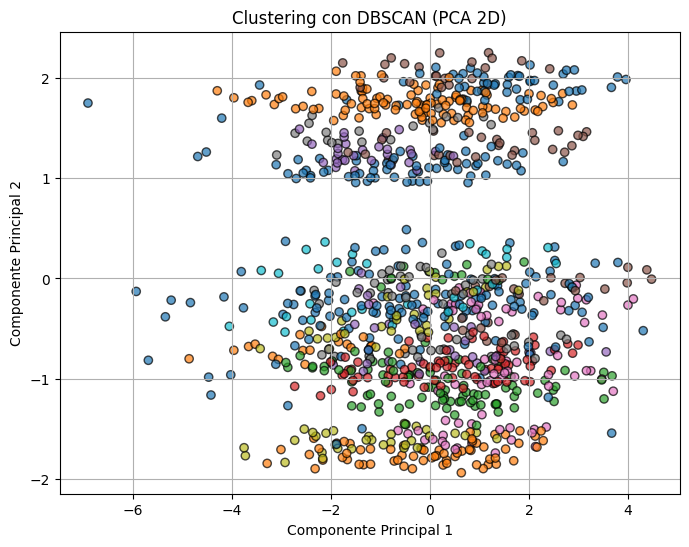

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=db_labels, cmap='tab10', alpha=0.7, edgecolor='k')
plt.title('Clustering con DBSCAN (PCA 2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


In [49]:
# N√∫mero de clusters (excluyendo ruido)
n_clusters_dbscan = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise = list(db_labels).count(-1)

print(f"N√∫mero de clusters encontrados por DBSCAN: {n_clusters_dbscan}")
print(f"N√∫mero de puntos considerados outliers (ruido): {n_noise}")


N√∫mero de clusters encontrados por DBSCAN: 37
N√∫mero de puntos considerados outliers (ruido): 103


In [50]:
if n_clusters_dbscan > 1:
    sil_db = silhouette_score(X_scaled, db_labels)
    print(f"Silhouette Score DBSCAN: {sil_db:.3f}")
else:
    print("DBSCAN no encontr√≥ suficientes clusters para calcular el Silhouette Score.")


Silhouette Score DBSCAN: 0.189


####La visualizaci√≥n de **DBSCAN** se ve distinta a la de **K-Means** porque **cada algoritmo agrupa datos con principios muy diferentes**.

 1. **Forma de los clusters**

* **K-Means** asume que los clusters son **esf√©ricos o circulares**, y que todos tienen un tama√±o similar.

  * Divide el espacio usando distancias al centroide (medias).
  * Siempre asigna **todos los puntos a alg√∫n cluster**.
* **DBSCAN**, en cambio, **no asume ninguna forma** para los clusters.

  * Detecta agrupaciones **basadas en densidad** (concentraci√≥n de puntos).
  * Puede formar clusters de forma **irregular** (alargados, curvos, etc.).

---

 2. **DBSCAN detecta outliers**

* **DBSCAN** puede etiquetar algunos puntos como **ruido** (`label = -1`), si est√°n muy lejos o aislados.

  * Esos puntos no se agrupan y aparecen dispersos o con un color distinto.
* **K-Means no puede detectar outliers**: siempre los incluye en alg√∫n grupo, incluso si no encajan bien.

---

 3. **Asignaci√≥n flexible vs r√≠gida**

* K-Means fuerza a que **cada punto pertenezca a alg√∫n cluster**.
* DBSCAN solo agrupa puntos **si est√°n en zonas de alta densidad**. Los puntos aislados quedan sin grupo.

---

#### Conclusi√≥n

> La visualizaci√≥n de DBSCAN se ve distinta porque **detecta agrupaciones m√°s naturales e irregulares** y **deja fuera los puntos ruidosos**, mientras que K-Means forma grupos m√°s uniformes y forzados.


## Conclusiones tras analisis


¬øQu√© diferencias se observaron en el agrupamiento no supervisado?

> Las diferencias claves fueron las diferencias en los onjetivos de los analisis de supervisados y no supervisados, dado que en los supervisados lo9 principal y mas importante es poder ver si los alumnos aprueban o reprueban dependiendo de sus notas promedio, estado economico y otros datos como nivel de educacion parental. Sin embargo, en el analisis no supervisado se busco ver como los distintos estudiantes se agrupavan tomando en cuenta todos los datos que se tienen de ellos, con lo que se logro identificar una gran coorelacion entre su formacion parental, promedios de notas y su estado economico, siendo este ultimo uno de los mas importantes. misentras mas bajo su estado economico menor sera su desempe√±o escolar.

¬øExisten coincidencias entre los estudiantes que reprueban y los clusters de bajo rendimiento?

> Si, se puede ver cierta relacion entre los estudiantes que repueban y el grupo al que se le asigno por Clusters. se explica mas en detalle las relaciones en los analisis de los modelos K-Means.

¬øC√≥mo podr√≠an usarse ambos enfoques para dise√±ar programas de apoyo, tutor√≠as o segmentaciones personalizadas?

> S√≠, creo que usar tanto enfoques supervisados como no supervisados puede ser s√∫per √∫til para dise√±ar programas de apoyo m√°s efectivos.
> Los modelos supervisados (como regresi√≥n log√≠stica, KNN o √°rboles de decisi√≥n) ayudan a predecir con m√°s claridad qui√©nes podr√≠an reprobar, considerando variables como las notas, el nivel socioecon√≥mico, si hicieron o no el curso de preparaci√≥n, o la educaci√≥n de los padres. Es como tener una alerta temprana para saber a qu√© estudiantes hay que prestar m√°s atenci√≥n antes de que bajen su rendimiento.

> Los modelos no supervisados, como K-Means y DBSCAN, sirven para ver agrupaciones m√°s naturales entre estudiantes, sin que se defina por "aprobar" o "reprobar". Fue bueno ya que sin la necesidad de esa etiqueta los algoritmos igual agrupaban a los estudiantes de bajo rendimiento junto a otros con caracter√≠sticas similares: bajos recursos, menor formaci√≥n parental, etc. Incluso DBSCAN fue de ayuda para detectar casos at√≠picos o estudiantes "fuera de grupo", que tal vez necesitan una estrategia distinta, m√°s personalizada.

> Entonces, llegamos a la conclusion de que combinar ambos enfoques permite hacer algo mucho m√°s completo:

> Usar los supervisados para anticiparse al fracaso acad√©mico.

> Y usar los no supervisados para entender mejor los perfiles y dise√±ar tutor√≠as o apoyos m√°s segmentados, seg√∫n las necesidades reales de cada grupo o estudiante.

> As√≠, no solo reaccionamos a los problemas cuando ya ocurrieron, sino que nos adelantamos y dise√±amos soluciones m√°s inteligentes y justas para todos.

In [51]:
# hacer un K-prototipes??

In [52]:
!pip install kmodes

In [53]:
from kmodes.kprototypes import KPrototypes

In [54]:
X

math score  reading score  writing score  test preparation course  lunch  \
0            72             72             74                        0      1   
1            69             90             88                        1      1   
2            90             95             93                        0      1   
3            47             57             44                        0      0   
4            76             78             75                        0      1   
..          ...            ...            ...                      ...    ...   
995          88             99             95                        1      1   
996          62             55             55                        0      0   
997          59             71             65                        1      0   
998          68             78             77                        1      1   
999          77             86             86                        0      0   

     parental level of education  gender_male  race/ethnicity_group B  \
0                              4        False                    True   
1                              2        False                   False   
2                              5        False                    True   
3                              3         True                   False   
4                              2         True                   False   
..                           ...          ...                     ...   
995                            5        False                   False   
996                            1         True                   False   
997                            1        False                   False   
998                            2        False                   False   
999                            2        False                   False   

     race/ethnicity_group C  race/ethnicity_group D  race/ethnicity_group E  
0                     False                   False                   False  
1                      True                   False                   False  
2                     False                   False                   False  
3                     False                   False                   False  
4                      True                   False                   False  
..                      ...                     ...                     ...  
995                   False                   False                    True  
996                    True                   False                   False  
997                    True                   False                   False  
998                   False                    True                   False  
999                   False                    True                   False  

[1000 rows x 11 columns]

In [55]:
!pip install kprototypes

In [56]:
cat_columns = [3, 4, 5, 6, 7, 8, 9, 10]

In [57]:
kp = KPrototypes(n_clusters=4, init='Cao', n_init=5, verbose=1)
clusters = kp.fit_predict(X, categorical=cat_columns)
# Print the resulting clusters
print(clusters)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 216, ncost: 160813.5108129412
Run: 1, iteration: 2/100, moves: 60, ncost: 159007.77357737656
Run: 1, iteration: 3/100, moves: 35, ncost: 158439.91901889545
Run: 1, iteration: 4/100, moves: 15, ncost: 158298.01920832065
Run: 1, iteration: 5/100, moves: 14, ncost: 158210.69805608277
Run: 1, iteration: 6/100, moves: 11, ncost: 158089.2670807599
Run: 1, iteration: 7/100, moves: 2, ncost: 158084.62907622944
Run: 1, iteration: 8/100, moves: 2, ncost: 158078.58208679085
Run: 1, iteration: 9/100, moves: 3, ncost: 158070.30168976224
Run: 1, iteration: 10/100, moves: 1, ncost: 158068.9366693634
Run: 1, iteration: 11/100, moves: 0, ncost: 158068.9366693634
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 319, ncost: 165093.99884686837
Run: 2, itera

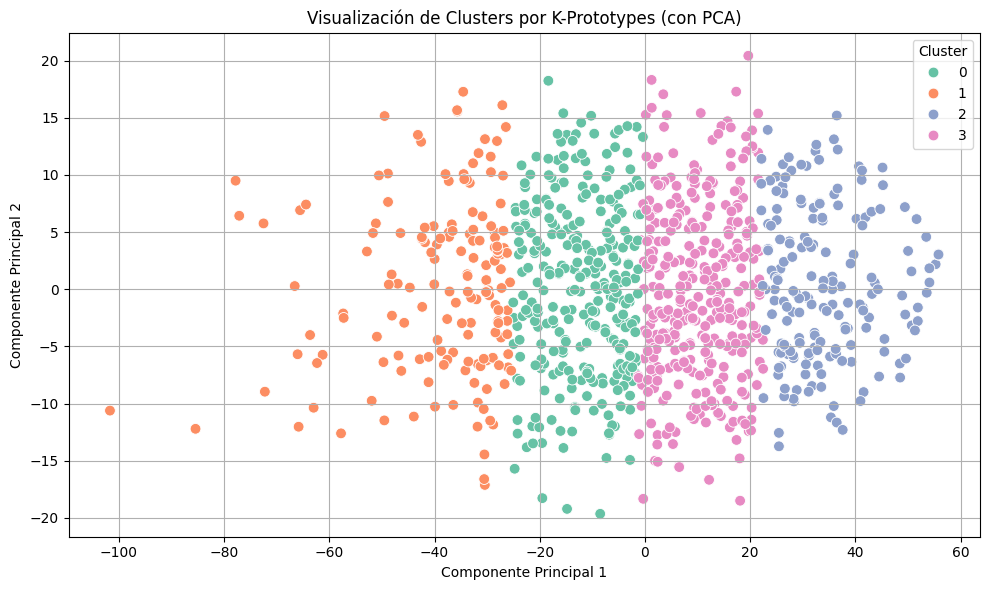

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Agrega los clusters al DataFrame
df['cluster'] = clusters

# Usa PCA para reducir las dimensiones a 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Crear un DataFrame con las componentes principales y los clusters
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters

# Visualizaci√≥n
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='Set2', s=60)
plt.title('Visualizaci√≥n de Clusters por K-Prototypes (con PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [59]:
from kmodes.kprototypes import KPrototypes

# Ajustar KPrototypes con k=3
kproto = KPrototypes(n_clusters=3, random_state=42, init='Huang', n_init=5)
clusters = kproto.fit_predict(X, categorical=cat_columns)


In [60]:
df['cluster'] = clusters


In [61]:
cluster_summary = df.groupby('cluster')[features].mean()
print(cluster_summary)


         math score  reading score  writing score
cluster                                          
0         65.365471      68.428251      67.760090
1         81.739414      85.159609      84.250814
2         47.943320      50.631579      48.453441


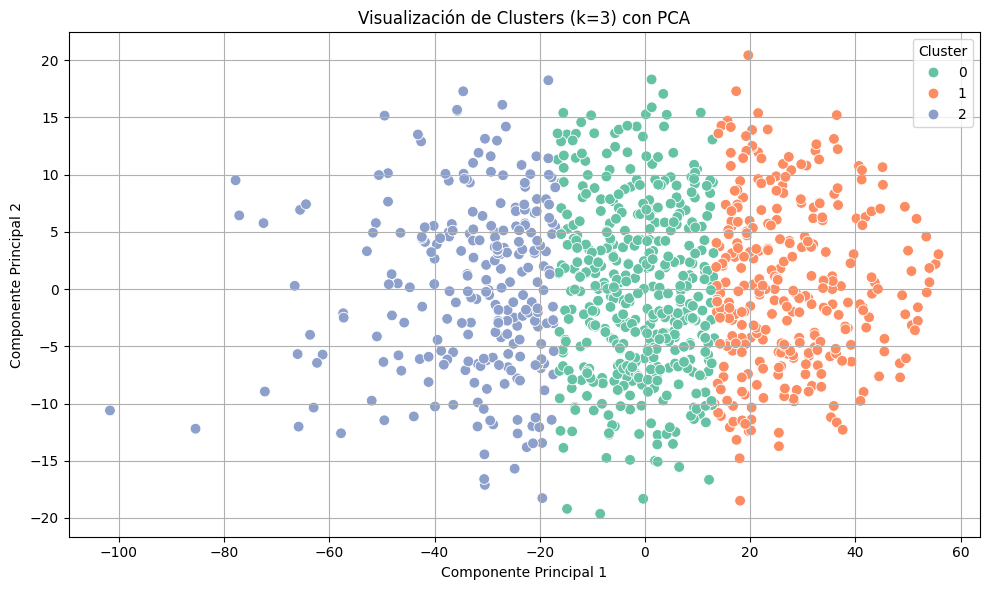

In [62]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reducir dimensiones para graficar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# DataFrame para visualizar
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters

# Graficar
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='Set2', s=60)
plt.title('Visualizaci√≥n de Clusters (k=3) con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


---

In [63]:
edu_order = {
    "some high school": 0,
    "high school": 1,
    "some college": 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5
}
edu_reverse = {v: k for k, v in edu_order.items()}


In [64]:
def interpret_education_level(avg_value):
    closest = round(avg_value)
    return edu_reverse.get(closest, "Unknown")


In [65]:
cluster_summary = df.groupby('cluster').mean()


In [66]:
# Aplicar a cada cluster el nivel de educaci√≥n parental
education_levels = cluster_summary['parental level of education'].apply(interpret_education_level)

# Mostrar resultados
for i, level in education_levels.items():
    print(f"Cluster {i}: Nivel educativo t√≠pico de los padres -> {level}")


Cluster 0: Nivel educativo t√≠pico de los padres -> some college
Cluster 1: Nivel educativo t√≠pico de los padres -> some college
Cluster 2: Nivel educativo t√≠pico de los padres -> some college


In [67]:
# Agrupar por cluster y calcular el promedio
cluster_summary = df.groupby('cluster')[features].mean()

# Crear un diccionario con un DataFrame por cluster
cluster_dfs = {f"cluster_{i}": df[df['cluster'] == i] for i in df['cluster'].unique()}

# Opcional: mostrar los DataFrames
for name, cluster_df in cluster_dfs.items():
    print(f"\n{name} (n = {len(cluster_df)}):")
    display(cluster_df.head())  # O usa print(cluster_df.head()) si no est√°s en Jupyter



cluster_0 (n = 446):


parental level of education  lunch  test preparation course  math score  \
0                             4      1                        0          72   
8                             1      0                        1          64   
12                            1      1                        0          65   
13                            2      1                        1          78   
15                            0      1                        0          69   

    reading score  writing score  average_score  approved  final_grade  \
0              72             74      72.666667      True    72.666667   
8              64             67      65.000000      True    65.000000   
12             81             73      73.000000      True    73.000000   
13             72             70      73.333333      True    73.333333   
15             75             78      74.000000      True    74.000000   

    gender_male  race/ethnicity_group B  race/ethnicity_group C  \
0         False                    True                   False   
8          True                   False                   False   
12        False                    True                   False   
13         True                   False                   False   
15        False                   False                    True   

    race/ethnicity_group D  race/ethnicity_group E  cluster  dbscan_cluster  
0                    False                   False        0               0  
8                     True                   False        0              32  
12                   False                   False        0               0  
13                   False                   False        0              -1  
15                   False                   False        0               5


cluster_1 (n = 307):


parental level of education  lunch  test preparation course  math score  \
1                            2      1                        1          69   
2                            5      1                        0          90   
4                            2      1                        0          76   
5                            3      1                        0          71   
6                            2      1                        1          88   

   reading score  writing score  average_score  approved  final_grade  \
1             90             88      82.333333      True    82.333333   
2             95             93      92.666667      True    92.666667   
4             78             75      76.333333      True    76.333333   
5             83             78      77.333333      True    77.333333   
6             95             92      91.666667      True    91.666667   

   gender_male  race/ethnicity_group B  race/ethnicity_group C  \
1        False                   False                    True   
2        False                    True                   False   
4         True                   False                    True   
5        False                    True                   False   
6        False                    True                   False   

   race/ethnicity_group D  race/ethnicity_group E  cluster  dbscan_cluster  
1                   False                   False        1               1  
2                   False                   False        1               0  
4                   False                   False        1               2  
5                   False                   False        1               0  
6                   False                   False        1              31


cluster_2 (n = 247):


parental level of education  lunch  test preparation course  math score  \
3                             3      0                        0          47   
7                             2      0                        0          40   
9                             1      0                        0          38   
10                            3      1                        0          58   
11                            3      1                        0          40   

    reading score  writing score  average_score  approved  final_grade  \
3              57             44      49.333333      True    49.333333   
7              43             39      40.666667      True    40.666667   
9              60             50      49.333333      True    49.333333   
10             54             52      54.666667      True    54.666667   
11             52             43      45.000000      True    45.000000   

    gender_male  race/ethnicity_group B  race/ethnicity_group C  \
3          True                   False                   False   
7          True                    True                   False   
9         False                    True                   False   
10         True                   False                    True   
11         True                   False                   False   

    race/ethnicity_group D  race/ethnicity_group E  cluster  dbscan_cluster  
3                    False                   False        2              34  
7                    False                   False        2               3  
9                    False                   False        2              28  
10                   False                   False        2               2  
11                    True                   False        2               4

In [68]:
cluster_0_df = cluster_dfs["cluster_0"]
cluster_1_df = cluster_dfs["cluster_1"]
cluster_2_df = cluster_dfs["cluster_2"]

In [69]:
edu_order = {
    0: "some high school",
    1: "high school",
    2: "some college",
    3: "associate's degree",
    4: "bachelor's degree",
    5: "master's degree"
}

cluster_2_df['parental level of education'].map(edu_order).value_counts()


parental level of education
high school           69
some high school      56
associate's degree    53
some college          42
bachelor's degree     19
master's degree        8
Name: count, dtype: int64

In [70]:
print("Distribuci√≥n de tipo de almuerzo:")
print(cluster_2_df['lunch'].map({1: 'standard', 0: 'free/reduced'}).value_counts())

print("\nPreparaci√≥n para el test:")
print(cluster_2_df['test preparation course'].map({1: 'completed', 0: 'none'}).value_counts())


Distribuci√≥n de tipo de almuerzo:
lunch
free/reduced    139
standard        108
Name: count, dtype: int64

Preparaci√≥n para el test:
test preparation course
none         196
completed     51
Name: count, dtype: int64


In [71]:
print("Distribuci√≥n de g√©nero:")
cluster_2_df['gender_male'].map({1: 'male', 0: 'female'}).value_counts()


Distribuci√≥n de g√©nero:


Series([], Name: count, dtype: int64)

In [72]:
edu_order = {
    0: "some high school",
    1: "high school",
    2: "some college",
    3: "associate's degree",
    4: "bachelor's degree",
    5: "master's degree"
}

cluster_1_df['parental level of education'].map(edu_order).value_counts()


parental level of education
associate's degree    80
some college          72
some high school      50
bachelor's degree     43
high school           34
master's degree       28
Name: count, dtype: int64

In [73]:
print("Distribuci√≥n de tipo de almuerzo:")
print(cluster_1_df['lunch'].map({1: 'standard', 0: 'free/reduced'}).value_counts())

print("\nPreparaci√≥n para el test:")
print(cluster_1_df['test preparation course'].map({1: 'completed', 0: 'none'}).value_counts())


Distribuci√≥n de tipo de almuerzo:
lunch
standard        236
free/reduced     71
Name: count, dtype: int64

Preparaci√≥n para el test:
test preparation course
none         154
completed    153
Name: count, dtype: int64
